# Lecture2.2: Linear Classifier

## 1. About Linear Classifier

<!-- <img src='https://docs.google.com/uc?export=view&id=1CIFcScqBjjk_jTM3-4bwooqULYKhhiDa' alt="no_image" style="width: 900px;"/> -->
<img src='./linear_classifier.png' alt='linear_classifier' style="width: 900px;"/>

#### Logistic Function g()
- **"Two-class classficiation"**
- $\boldsymbol{y} = A\boldsymbol{x} + \boldsymbol{b}$
    - Where $\boldsymbol{y}$ is a vector comprising the 2-class prediction $y_0$ and $y_1$
    - Where the labels are $y_0 = 0$  and $y_1 = 1$
    - Also, it's bolded because it's a vector, not a matrix.
- $g(y_1) = \frac {1} {1 + e^{-y_1}}$
    - $g(y_1)$ = Estimated probability that $y = 1$
- $g(y_0) = 1 - g(y_1)$
    - $g(y_0)$ = Estimated probability that $y = 0$

#### Softmax Function g()
- **"Multi-class classification"**
    - Generalization of logistic function, where you can derive back to the logistic function if you've a 2 class classification problem
    - Here, we will use a 4 class example (K = 4) to be very clear in how it relates back to that simple examaple.
- $\boldsymbol{y} = A\boldsymbol{x} + \boldsymbol{b}$
    - Where $\boldsymbol{y}$ is a vector comprising the 4-class prediction $y_0, y_1, y_2, y_3$
    - Where the 4 labels (K = 4) are $y_0 = 0, y_1 = 1, y_2 = 2, y_3 = 3$
- $g(y_i) = \frac {e^{y_i} } {\sum^K_i e^{y_i}}$ where K = 4 because we have 4 classes
    - To put numbers to this equation in relation to the illustration above where we've $y_0 = 1.3, y_1 = 1.2, y = 4.5, y = 4.8$
        - $g(y_0) = \frac {e^{1.3}}{e^{1.3} + e^{1.2} + e^{4.5} + e^{4.8}} = 0.017$
        - $g(y_1) = \frac {e^{1.2}}{e^{1.3} + e^{1.2} + e^{4.5} + e^{4.8}} = 0.015$
        - $g(y_2) = \frac {e^{4.5}}{e^{1.3} + e^{1.2} + e^{4.5} + e^{4.8}} = 0.412$
        - $g(y_3) = \frac {e^{4.8}}{e^{1.3} + e^{1.2} + e^{4.5} + e^{4.8}} = 0.556$
        - $g(y_0) + g(y_1) + g(y_2) + g(y_3) = 1.0$
        - All softmax outputs have to sum to one as they represent a probability distribution over K classes.
- Take note how these numbers are not exactly as in the illustration in the softmax box but the concept is important (intentionally made so).
    - $y_0$ and $y_1$ are approximately similar in values and they return similar probabilities.
    - Similarly, $y_2$ and $y_3$ are approximately similar in values and they return similar probabilities.

#### Cross Entropy Function D() for 2 Class
- Take note that here, $S$ is our softmax outputs and $L$ are our labels
- $D(S, L) = -(L log S + (1-L)log(1-S))$
    - If L = 0 (label)
        - $D(S, 0) = - log(1-S)$
            - $- log(1-S)$: less positive if $S \longrightarrow 0$
            - $- log(1-S)$: more positive if $S \longrightarrow 1$ (BIGGER LOSS)
    - If L = 1 (label)
        - $D(S, 1) = - log S$
            - $-log(S)$: less positive if $S \longrightarrow 1$
            - $-log(S)$: more positive if $S \longrightarrow 0$ (BIGGER LOSS)

#### Cross Entropy Function D() for More Than 2 Class
- For the case where we have more than 2 class, we need a more generalized function
- $D(S, L) = - \sum^K_1 L_i log(S_i)$
    - $K$: number of classes
    - $L_i$: label of i-th class, 1 if that's the class else 0
    - $S_i$: output of softmax for i-th class

#### Cross Entropy Loss over N samples
- Goal: Minimizing Cross Entropy Loss, L
- $Loss = \frac {1}{N} \sum_j^N D_j$
    - $D_j$: j-th sample of cross entropy function $D(S, L)$
    - $N$: number of samples
    - $Loss$: average cross entropy loss over N samples

## 2. Building a Linear Classifier Model with PyTorch

<img src="https://docs.google.com/uc?export=view&id=1hhZ0Y9atTpH4hJSzUVJYRCvPvfQ95_LP" alt="no_image" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

### Step 1a: Loading MNIST Train Dataset
#### Images from 1 to 9

**Inspect length of training dataset**

You can easily load MNIST dataset with PyTorch. Here we inspect the training set, where our algorithms will learn from, and you will discover it is made up of 60,000 images.

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [3]:
train_dataset = dsets.MNIST(root='./data/MNIST/',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

len(train_dataset)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw



60000

**Inspecting a single image**

So this is how a single image is represented in numbers. It's actually a 28 pixel x 28 pixel image which is why you would end up with this 28x28 matrix of numbers.

In [4]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

**Inspecting a single data point in the training dataset**

When you load MNIST dataset, each data point is actually a tuple containing the image matrix and the label.

In [5]:
type(train_dataset[0])

tuple

**Inspecting training dataset first element of tuple**

This means to access the image, you need to access the first element in the tuple.

In [7]:
# Input Matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

**Inspecting training dataset second element of tuple**

The second element actually represents the image's label. Meaning if the second element says 5, it means the 28x28 matrix of numbers represent a digit 5.

In [8]:
# Label
train_dataset[0][1]

5

#### Displaying MNIST

**Verifying shape of MNIST image**

As mentioned, a single MNIST image is of the shape 28 pixel x 28 pixel.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

**Plot image of MNIST image**

In [11]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

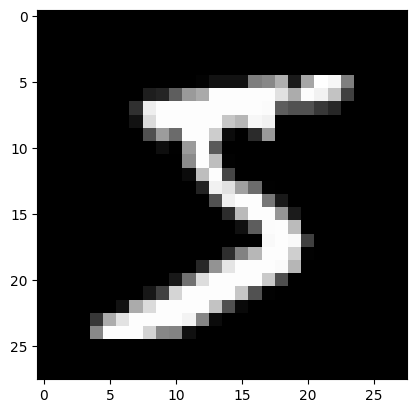

In [12]:
plt.imshow(show_img, cmap='gray')

**Second element of tuple shows label**

As you would expect, the label is 5.

In [13]:
# Label
train_dataset[0][1]

5

**Plot second image of MNIST image**

In [14]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)

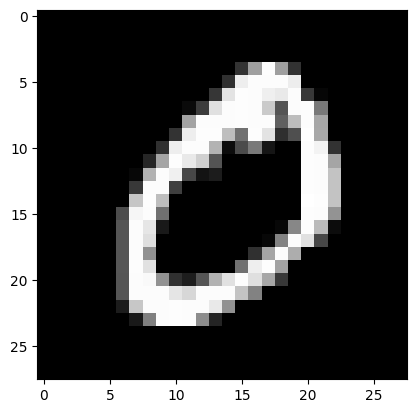

In [15]:
plt.imshow(show_img, cmap='gray')

**Second element of tuple shows label**

We should see 0 here as the label.

In [16]:
# Label
train_dataset[1][1]

0

### Step 1b: Loading MNIST Test Dataset
- Show our algorithm works beyond the data we have trained on.
- Out-of-sample

**Load test dataset**

Compared to the 60k images in the training set, the testing set where the model will not be trained on has 10k images to check for its out-of-sample performance.

In [17]:
test_dataset = dsets.MNIST(root='./data/MNIST/',
                           train=False,
                           transform=transforms.ToTensor())

In [18]:
len(test_dataset)

10000

**Test dataset elements**

Exactly like the training set, the testing set has 10k tuples containing the 28x28 matrices and their respective labels.

In [19]:
type(test_dataset[0])

tuple

**Test dataset first element in tuple**

This contains the image matrix, similar to the training set.

In [20]:
# Image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

**Plot image sample from test dataset**

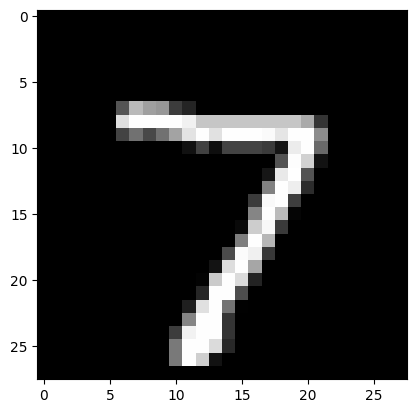

In [21]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

**Test dataset second element in tuple**

In [22]:
# Label
test_dataset[0][1]

7

### Step 2: Make Dataset Iterable
- Aim: make the dataset iterable
- **totaldata**: 60000
- **minibatch**: 100
    - Number of examples in 1 iteration
- **iterations**: 3000
    - 1 iteration: one mini-batch forward & backward pass
- **epochs**
    - 1 epoch: running through the whole dataset once
    - $epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{60000}{100} = 5$

**Recap training dataset**

Remember training dataset has 60k images and testing dataset has 10k images.

In [23]:
len(train_dataset)

60000

**Defining epochs**

When the model goes through the whole 60k images once, learning how to classify 0-9, it's consider 1 epoch.

However, there's a concept of batch size where it means the model would look at 100 images before updating the model's weights, thereby learning. When the model updates its weights (parameters) after looking at all the images, this is considered 1 iteration.

In [24]:
batch_size = 100

We arbitrarily set 3000 iterations here which means the model would update 3000 times.

In [25]:
n_iters = 3000

One epoch consists of 60,000 / 100 = 600 iterations. Because we would like to go through 3000 iterations, this implies we would have 3000 / 600 = 5 epochs as each epoch has 600 iterations.

In [26]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

**Create Iterable Object: Training Dataset**

In [27]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

**Check Iterability**

In Python, the .abc in collections.abc stands for "Abstract Base Classes".

Abstract Base Classes (ABCs) are a way to define interfaces or abstract classes in Python.

They provide a way to define a common API that multiple classes can implement.

The collections.abc module specifically provides a set of abstract base classes for various collection types.

These abstract base classes define the common methods and behaviors that collections should have, such as iteration, containment checks, and length determination.



In [28]:
import collections
isinstance(train_loader, collections.abc.Iterable)

True

**Create Iterable Object: Testing Dataset**

In [29]:
# Iterable object
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

**Check iterability of testing dataset**

In [30]:
isinstance(test_loader, collections.abc.Iterable)

True

### Step 3: Building Model

**Create model class**

In [31]:
# Same as linear regression!
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

### Step 4: Instantiate Model Class
- Input dimension:
    - Size of image
    - $28 \times 28 = 784$
- Output dimension: 10
    - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

**Check size of dataset**

This should be 28x28.

In [32]:
# Size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

**Instantiate model class based on input and out dimensions**

As we're trying to classify digits 0-9 a total of 10 classes, our output dimension is 10.

And we're feeding the model with 28x28 images, hence our input dimension is 28x28.

In [33]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

### Step 5: Instantiate Loss Class
- **Logistic Regression**: Cross Entropy Loss
    - _Linear Regression: MSE_
   

**Create Cross Entry Loss Class**

Unlike linear regression, we do not use MSE here, we need Cross Entry Loss to calculate our loss before we backpropagate and update our parameters.

In [34]:
criterion = nn.CrossEntropyLoss()

**What happens in `nn.CrossEntropyLoss()`?**

It does 2 things at the same time.


1. Computes softmax (logistic/softmax function)
2. Computes cross entropy

<!-- <img src="https://docs.google.com/uc?export=view&id=1CIFcScqBjjk_jTM3-4bwooqULYKhhiDa" alt="no_image" style="width: 900px;"/> -->
<img src="./linear_classifier.png" alt="linear_classifer" style="width: 900px;"/>

### Step 6: Instantiate Optimizer Class
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
    - **At every iteration, we update our model's parameters**

**Create optimizer**

Similar to what we've covered above, this calculates the parameters' gradients and update them subsequently.

In [35]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Parameters In-Depth**


You'll realize we have 2 sets of parameters, 10x784 which is A and 10x1 which is b in the $y = AX + b$ equation where X is our input of size 784.
    
We'll go into details subsequently how these parameters interact with our input to produce our 10x1 output.

In [36]:
# Type of parameter object
print(model.parameters())

<generator object Module.parameters at 0x133b27d80>


In [37]:
# Length of parameters
print(len(list(model.parameters())))

2


In [38]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0204,  0.0311,  0.0010,  ..., -0.0126,  0.0032,  0.0256],
         [ 0.0095, -0.0134,  0.0058,  ...,  0.0227, -0.0180,  0.0050],
         [ 0.0071, -0.0142, -0.0143,  ...,  0.0306, -0.0111, -0.0117],
         ...,
         [-0.0150,  0.0130, -0.0306,  ..., -0.0140, -0.0323, -0.0060],
         [ 0.0348,  0.0104, -0.0111,  ..., -0.0297,  0.0351,  0.0099],
         [ 0.0286,  0.0165,  0.0203,  ...,  0.0076, -0.0267,  0.0183]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0130,  0.0109,  0.0174,  0.0046, -0.0088, -0.0261,  0.0200,  0.0286,
         -0.0305,  0.0053], requires_grad=True)]

In [39]:
# FC 1 Parameters
print(list(model.parameters())[0].size())

torch.Size([10, 784])


In [40]:
# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

torch.Size([10])


**Quick Matrix Product Review**

- Example 1: **matrix product**
    - $A: (100, 10)$
    - $B: (10, 1)$
    - $A \cdot B = (100, 10) \cdot (10, 1) = (100, 1)$
- Example 2: **matrix product**
    - $A: (50, 5)$
    - $B: (5, 2)$
    - $A \cdot B = (50, 5) \cdot (5, 2) = (50, 2)$
- Example 3: **element-wise addition**
    - $A: (10, 1)$
    - $B: (10, 1)$
    - $A + B = (10, 1)$

<!-- <img src="https://docs.google.com/uc?export=view&id=1z5vwTT-_KH0HbMkdVnepiaWFDA6fLI4X" alt="no_image" style="width: 900px;"/>     -->
<img src="./matrix_mul.png" alt="matrix_mul" style="width: 900px;"/>

### Step 7: Train Model

**7 step process for training models**

 - Process
    1. Convert inputs/labels to tensors with gradients
    2. Clear gradient buffets
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28)
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8910502195358276. Accuracy: 68.06
Iteration: 1000. Loss: 1.565972089767456. Accuracy: 76.25
Iteration: 1500. Loss: 1.4104591608047485. Accuracy: 79.22
Iteration: 2000. Loss: 1.192899227142334. Accuracy: 81.0
Iteration: 2500. Loss: 1.0807733535766602. Accuracy: 82.03
Iteration: 3000. Loss: 0.8909265398979187. Accuracy: 82.93


#### Break Down Accuracy Calculation

**Printing outputs of our model**

As we've trained our model, we can extract the accuracy calculation portion to understand what's happening without re-training the model.

This would print out the output of the model's predictions on your notebook.

In [ ]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs)
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([[-5.3806e-01, -1.3311e+00, -3.8942e-01, -6.1683e-02,  2.1326e-02,
         -3.8761e-01, -1.1296e+00,  2.8961e+00, -2.9955e-01,  8.7800e-01],
        [ 1.1365e-01, -1.7348e-01,  1.3398e+00,  7.8565e-01, -2.0049e+00,
          6.1277e-01,  1.1524e+00, -1.9810e+00,  4.8375e-01, -1.6376e+00],
        [-1.0273e+00,  2.2230e+00,  1.2939e-01,  1.1475e-01, -7.1392e-01,
         -4.3142e-01, -1.4781e-01, -2.4411e-01,  1.9400e-01, -3.9649e-01],
        [ 2.8029e+00, -2.3033e+00, -2.6881e-01, -2.7979e-01, -8.8174e-01,
          3.1375e-01,  1.0108e+00,  1.5725e-01, -6.2363e-01, -1.8102e-01],
        [-8.5723e-02, -2.0875e+00,  3.7092e-01, -6.9420e-01,  1.5404e+00,
         -4.1012e-01,  3.1248e-01,  3.8402e-01,  8.4343e-02,  5.9873e-01],
        [-1.4254e+00,  2.6394e+00,  1.6287e-02,  1.8042e-01, -8.0529e-01,
         -5.1382e-01, -6.5838e-01, -8.1144e-02,  3.6361e-01, -1.3445e-01],
        [-1.1802e+00, -1.2113e+00, -5.8576e-01,  1.6118e-01,  1.2087e+00,
          5.1632e-01, -8

**Printing output size**

This produces a 100x10 matrix because each iteration has a batch size of 100 and each prediction across the 10 classes, with the largest number indicating the likely number it is predicting.

In [ ]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs.size())
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
torch.Size([100, 10])


**Printing one output**

This would be a 1x10 matrix where the largest number is what the model thinks the image is. Here we can see that in the tensor, position 7 has the largest number, indicating the model thinks the image is 7.

number 0: -0.4876

number 1: -2.2708

...

number 7: 4.6617

In [ ]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs[0, :])
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([-0.5381, -1.3311, -0.3894, -0.0617,  0.0213, -0.3876, -1.1296,  2.8961,
        -0.2996,  0.8780], grad_fn=<SliceBackward>)


**Printing prediction output**

Because our output is of size 100 (our batch size), our prediction size would also of the size 100.

In [ ]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted.size())

PREDICTION
torch.Size([100])


**Print prediction value**

We are printing our prediction which as verified above, should be digit 7.

In [ ]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])

PREDICTION
tensor(7)


**Print prediction, label and label size**

We are trying to show what we are predicting and the actual values. In this case, we're predicting the right value 7!

In [ ]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])
        print('\n')
        print('LABEL SIZE')
        print(labels.size())
        print('\n')
        print('LABEL FOR IMAGE 0')
        print(labels[0])

PREDICTION
tensor(7)


LABEL SIZE
torch.Size([100])


LABEL FOR IMAGE 0
tensor(7)


**Print second prediction and ground truth**

Again, the prediction is correct. Naturally, as our model is quite competent in this simple task.

In [ ]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    if iter_test == 1:
        print('PREDICTION')
        print(predicted[1])

        print('LABEL SIZE')
        print(labels.size())

        print('LABEL FOR IMAGE 1')
        print(labels[1])

PREDICTION
tensor(2)
LABEL SIZE
torch.Size([100])
LABEL FOR IMAGE 1
tensor(2)


**Print accuracy**

Now we know what each object represents, we can understand how we arrived at our accuracy numbers.
    
One last thing to note is that `correct.item()` has this syntax is because `correct` is a PyTorch tensor and to get the value to compute with `total` which is an integer, we need to do this.

In [ ]:
correct = 0
total = 0
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    # Total number of labels
    total += labels.size(0)

    # Total correct predictions
    correct += (predicted == labels).sum()

accuracy = 100 * (correct.item() / total)

print(accuracy)

82.93


**Explanation of Python's `.sum()` function**

Python's `.sum()` function allows you to do a comparison between two matrices and sum the ones that return `True` or in our case, those predictions that match actual labels (correct predictions).

In [ ]:
# Explaining .sum() python built-in function
# correct += (predicted == labels).sum()
import numpy as np
a = np.ones((10))
print(a)
b = np.ones((10))
print(b)

print(a == b)

print((a == b).sum())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ True  True  True  True  True  True  True  True  True  True]
10


#### Saving Model

**Saving PyTorch model**

This is how you save your model. Feel free to just change `save_model = True` to save your model

In [ ]:
save_model = False
if save_model is True:
    # Saves only parameters
    torch.save(model.state_dict(), 'awesome_model.pkl')

## 3. Building a Linear Classifier Model with PyTorch (GPU)

**CPU version**

The usual 7-step process, getting repetitive by now which we like.

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data/MNIST/',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data/MNIST/',
                           train=False,
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28)
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # 100 x 10
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                # 100 x 1
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8518311977386475. Accuracy: 67.28
Iteration: 1000. Loss: 1.5139033794403076. Accuracy: 76.6
Iteration: 1500. Loss: 1.3985611200332642. Accuracy: 79.46
Iteration: 2000. Loss: 1.2422677278518677. Accuracy: 81.2
Iteration: 2500. Loss: 1.090103268623352. Accuracy: 82.24
Iteration: 3000. Loss: 1.017002820968628. Accuracy: 82.81


**CPU Version**

2 things must be on GPU
- `model`
- `tensors`

Remember step 4 and 7 will be affected and this will be the same for all model building moving forward.

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data/MNIST/',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data/MNIST/',
                           train=False,
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        #######################
        #  USE GPU FOR MODEL  #
        #######################
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.954784870147705. Accuracy: 65.71
Iteration: 1000. Loss: 1.5199520587921143. Accuracy: 75.4
Iteration: 1500. Loss: 1.2795016765594482. Accuracy: 79.09
Iteration: 2000. Loss: 1.228691577911377. Accuracy: 80.77
Iteration: 2500. Loss: 1.077915906906128. Accuracy: 81.9
Iteration: 3000. Loss: 0.8749342560768127. Accuracy: 82.68


## Summary

- **Linear Classifier** basics
    1. Get logits
    2. Get softmax
    3. Get cross-entropy loss
- **Aim**: reduce cross-entropy loss
- Built a **linear classifier model** in **CPU and GPU**
    - Step 1: Load Dataset
    - Step 2: Make Dataset Iterable
    - Step 3: Create Model Class
    - Step 4: Instantiate Model Class
    - Step 5: Instantiate Loss Class
    - Step 6: Instantiate Optimizer Class
    - Step 7: Train Model
- Important things to be on **GPU**
    - `model`
    - `tensors with gradients`

### *References*
[1] [DOI](https://zenodo.org/badge/139945544.svg)(https://zenodo.org/badge/latestdoi/139945544)